In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
print(pd.__version__)
import joblib

2.2.3


In [2]:
import os
import sys
sys.path.append(os.path.abspath('..'))

In [3]:
%load_ext autoreload
%autoreload 2

In [3]:
from scripts.preprocessor import DataProcessing
from scripts.model_training import TrainData, SplitData, EvaluateModel
from scripts.model_plot import PlotMetrics

2025-01-14 21:29:00,245 - INFO - spliting the dataset into 80 and 20% 
2025-01-14 21:29:00,245 - INFO - training begins with the training dataset
2025-01-14 21:29:00,245 - INFO - Evaluating models now begin..


In [4]:
df = pd.read_csv('../data/cleaned_data.csv')
df['Date'] = pd.to_datetime(df['Date'], errors= 'coerce')
df.set_index('Date', inplace=True)

C:\Users\Temp\AppData\Local\Temp\ipykernel_5752\3142219535.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/cleaned_data.csv')


In [5]:
df['StateHoliday'] = df['StateHoliday'].astype(bool)
df['SchoolHoliday'] = df['SchoolHoliday'].astype(bool)
df['Open'] = df['Open'].astype(bool)

In [6]:
df = df.drop_duplicates(keep='first')

In [7]:
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [8]:
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,True,1,False,True,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2015-07-31,2,5,6064,625,True,1,False,True,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2015-07-31,3,5,8314,821,True,1,False,True,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2015-07-31,4,5,13995,1498,True,1,False,True,c,c,620.0,9.0,2009.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
2015-07-31,5,5,4822,559,True,1,False,True,a,a,29910.0,4.0,2015.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [15]:
dp = DataProcessing(df)
dp.show_correlation_matrix(['Sales'])

,Sales
Store,0.005126
DayOfWeek,-0.462125
Sales,1.000000
Customers,0.894711
Promo,0.452345
CompetitionDistance,-0.018578
CompetitionOpenSinceMonth,-0.007409
CompetitionOpenSinceYear,0.011664
Promo2,-0.091040
Promo2SinceWeek,0.023678


In [16]:
labeled_df = dp.encode_data()
labeled_df

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2,0,1270.0,9.0,2008.0,0,NaN,NaN,3
2015-07-31,2,5,6064,625,1,1,0,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,1
2015-07-31,3,5,8314,821,1,1,0,1,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,1
2015-07-31,4,5,13995,1498,1,1,0,1,2,2,620.0,9.0,2009.0,0,14.0,2011.0,1
2015-07-31,5,5,4822,559,1,1,0,1,0,0,29910.0,4.0,2015.0,0,14.0,2011.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-01,1111,2,0,0,0,0,1,1,0,0,1900.0,6.0,2014.0,1,31.0,2013.0,1
2013-01-01,1112,2,0,0,0,0,1,1,2,2,1880.0,4.0,2006.0,0,31.0,2013.0,1
2013-01-01,1113,2,0,0,0,0,1,1,0,2,9260.0,4.0,2006.0,0,31.0,2013.0,1


In [17]:
standardize_df = dp.standardize_data(labeled_df)
standardize_df

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,,,
2015-07-31,-1.731640,0.501484,-0.132683,-0.168269,0.452399,1.273237,-1.259721,2.144211,0.580451,-0.940975,-0.538486,0.554018,-0.096122,-1.001128,NaN,NaN,3.012041
2015-07-31,-1.728534,0.501484,0.075373,-0.017540,0.452399,1.273237,-1.259721,2.144211,-0.884348,-0.940975,-0.629300,1.181648,-0.250618,0.998873,-0.775796,-1.062856,0.049044
2015-07-31,-1.725427,0.501484,0.659800,0.404499,0.452399,1.273237,-1.259721,2.144211,-0.884348,-0.940975,1.129901,1.495463,-0.405115,0.998873,-0.704886,-0.460415,0.049044
2015-07-31,-1.722321,0.501484,2.135414,1.862258,0.452399,1.273237,-1.259721,2.144211,0.580451,1.071502,-0.622813,0.554018,0.058375,-1.001128,-0.704886,-0.460415,0.049044
2015-07-31,-1.719214,0.501484,-0.247231,-0.159656,0.452399,1.273237,-1.259721,2.144211,-0.884348,-0.940975,3.177113,-1.015057,0.985354,-1.001128,-0.704886,-0.460415,0.049044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-01,1.716545,-1.000476,-1.499723,-1.363330,-2.210440,-0.785400,0.793827,2.144211,-0.884348,-0.940975,-0.456753,-0.387427,0.830857,0.998873,0.500575,0.744468,0.049044
2013-01-01,1.719651,-1.000476,-1.499723,-1.363330,-2.210440,-0.785400,0.793827,2.144211,0.580451,1.071502,-0.459348,-1.015057,-0.405115,-1.001128,0.500575,0.744468,0.049044
2013-01-01,1.722758,-1.000476,-1.499723,-1.363330,-2.210440,-0.785400,0.793827,2.144211,-0.884348,1.071502,0.498094,-1.015057,-0.405115,-1.001128,0.500575,0.744468,0.049044


In [18]:
x = standardize_df.drop('Sales', axis=1)
y = standardize_df['Sales']

In [19]:
sp = SplitData(x, y)

x_train, x_test, y_train, y_test = sp.split_data()

In [20]:
td = TrainData(x_train, y_train)

In [21]:
xg_model = td.xgboost()

In [50]:
import datetime ,time
def model_time():
    timestamp = time.time()
    readable_time = datetime.datetime.fromtimestamp(timestamp)
    formatted_time = readable_time.strftime('%Y-%m-%d-%H-%M-%S')
    return formatted_time
    

In [51]:
joblib.dump(xg_model, f'../models/{model_time()}.pkl')

['../models/2025-01-14-12-08-16.pkl']

In [42]:
random_forest_model = td.random_forest()

In [53]:
joblib.dump(random_forest_model, f'../models/{model_time()}.pkl')

['../models/2025-01-14-12-24-41.pkl']

In [20]:
eval = EvaluateModel()
mae_scores, mse_scores, r2_scores = [], [], []
models = ['RandomForest', 'XGBOOST']

for model in [random_forest_model, xg_model]:
    mae, mse, r2, _ = eval.evaluate_model(model, x_test, y_test)
    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)


for i, model_name in enumerate(models):
    print(f'Evaluate result for {model_name}: ')
    print(f'      Mean absolute error (MAE): {mae_scores[i]} ')
    print(f'      Mean Squared  error (MSE): {mse_scores[i]} ')
    print(f'      r2_score  {r2_scores[i]}')

Evaluate result for RandomForest: 
      Mean absolute error (MAE): 0.07875581920688432 
      Mean Squared  error (MSE): 0.016447510475072848 
      r2_score  0.9835156538764728
Evaluate result for XGBOOST: 
      Mean absolute error (MAE): 0.1301279751970734 
      Mean Squared  error (MSE): 0.037242842664748 
      r2_score  0.9626737487086444


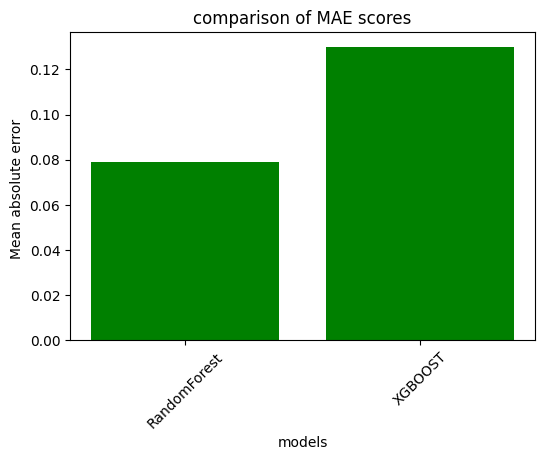

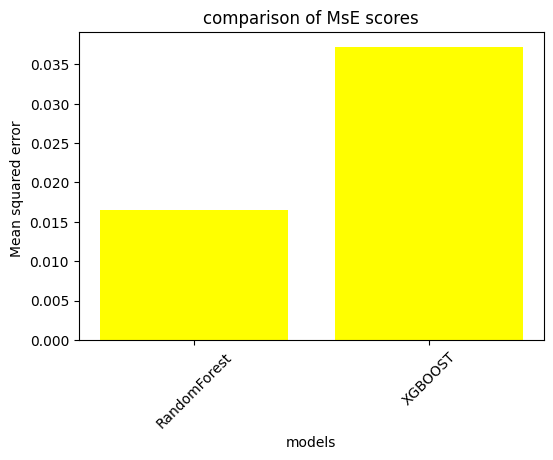

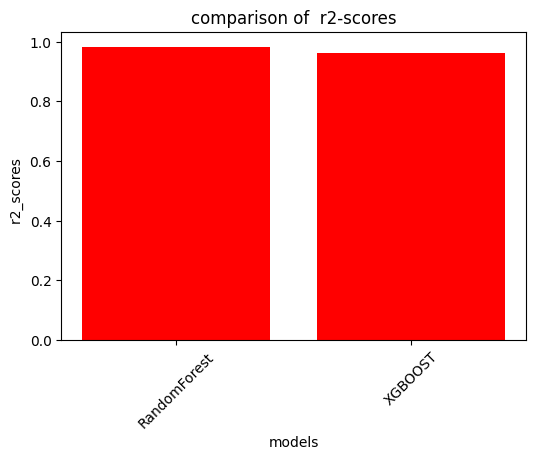

In [22]:
plot = PlotMetrics(models,mae_scores, mse_scores, r2_scores)

plot.plot()

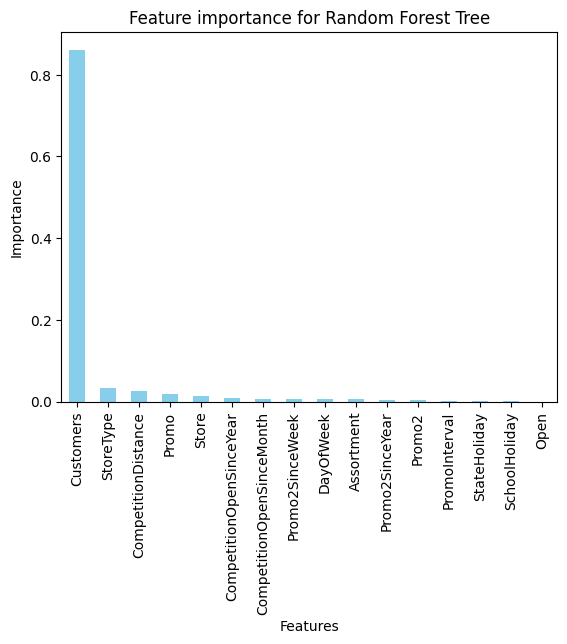

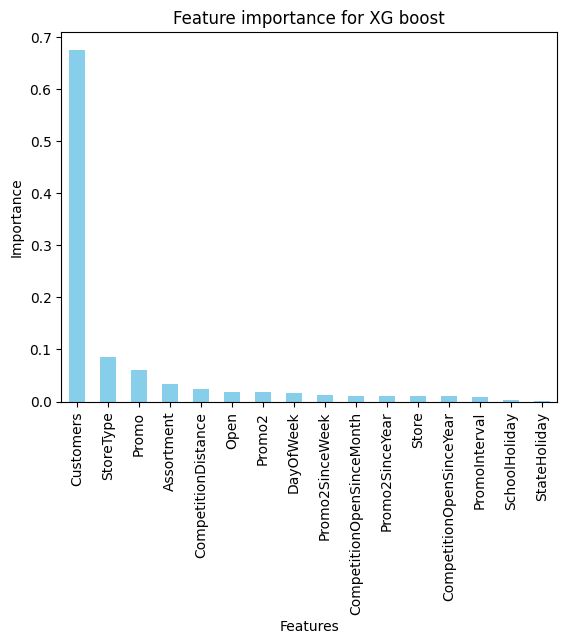

In [25]:
def plot_feature_importance(model, feature_names, model_name):
    feature_importance =pd.DataFrame(model.feature_importances_, index = feature_names, columns = ["Importance"])
    feature_importance = feature_importance.sort_values(by = "Importance", ascending=False)

    plt.Figure(figsize=(20,36))
    feature_importance.plot(kind='bar', legend=False, color = 'skyblue')
    plt.title(f'Feature importance for {model_name}')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation = 90)
    plt.show()


plot_feature_importance(random_forest_model, x_train.columns, "Random Forest Tree")
plot_feature_importance(xg_model, x_train.columns, "XG boost")

In [ ]:
import joblib

